<a href="https://colab.research.google.com/github/Pranov1984/Identify-The-Apparel/blob/master/Identify_the_Apparel_Using_Dense_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Setting the log level of tensorflow to ignore some warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
test_path = "/content/drive/My Drive/Colab Notebooks/AV_DL/Project_April_Apparel/test.zip"


In [0]:
from keras.datasets import fashion_mnist
#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
#https://github.com/nadia1123/fashion-mnist-keras/blob/master/Fashion%20MNIST%20in%20Keras%20using%20a%20Multilayer%20perceptron.ipynb

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

(-0.5, 27.5, 27.5, -0.5)

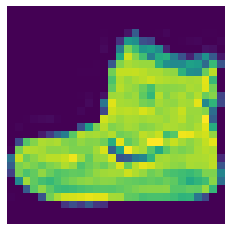

In [0]:
# visualizing the data
plt.imshow(X_train[0])
plt.axis('off')

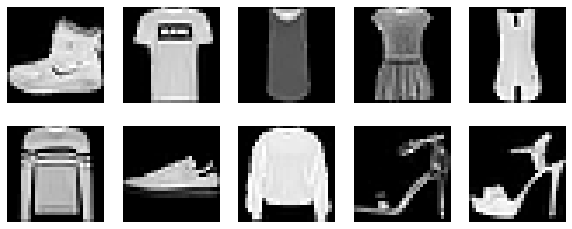

label for each of the above image: [9 0 0 3 0 2 7 2 5 5]


In [0]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

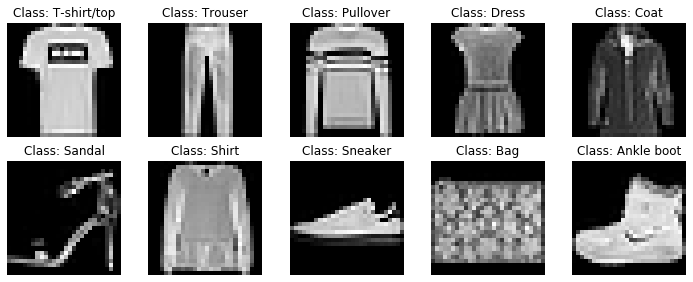

In [0]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')
    
plt.tight_layout()

In [0]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [0]:
y_test.shape

(10000,)

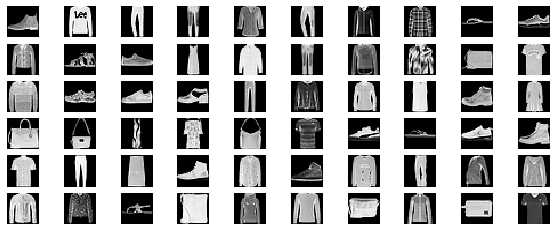

label for each of the above image: [9 2 1 1 6 1 4 6 5 7]


In [0]:
plt.figure(figsize=(10,4))
for i in range(60):
  plt.subplot(6,10,i+1)
  plt.imshow(X_test[i], cmap="gray")
  plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_test[0:10]))

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=1, test_size=0.1)
X_train, X_Test, y_train, y_Test = train_test_split(X_train,y_train, random_state=1, test_size=0.2)

X_train.shape, X_Test.shape , X_val.shape,y_train.shape, y_Test.shape, y_val.shape

((43200, 28, 28), (10800, 28, 28), (6000, 28, 28), (43200,), (10800,), (6000,))

In [0]:
#Normalize the data
X_train = X_train.astype('float32')
X_train= X_train/255

In [0]:
X_val = X_val.astype('float32')
X_val= X_val/255

X_test = X_test.astype('float32')
X_test= X_test/255

X_Test = X_Test.astype('float32')
X_Test= X_Test/255

In [0]:
#Reshape/flatten the data
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_Test = X_Test.reshape((X_Test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [0]:
X_train.shape, X_Test.shape , X_val.shape,y_train.shape, y_Test.shape, y_val.shape

((43200, 784), (10800, 784), (6000, 784), (43200, 10), (10800, 10), (6000, 10))

Build a Dense Model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, Dropout, BatchNormalization
from keras.optimizers import adam, rmsprop, sgd
from keras.losses import categorical_crossentropy

In [0]:
model=Sequential()
model.add(Dense(1024, input_shape=(784,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model=Sequential()
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))

model=Sequential()
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))

model=Sequential()
model.add(Dense(10, activation='softmax'))

opt=adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(X_train,y_train, epochs=50, batch_size=512, validation_data=(X_Test, y_Test))

Train on 43200 samples, validate on 10800 samples
Epoch 1/50
43200/43200 [==============================] - 0s 10us/step - loss: 0.3512 - acc: 0.8776 - val_loss: 0.4245 - val_acc: 0.8544
Epoch 2/50
43200/43200 [==============================] - 0s 9us/step - loss: 0.3506 - acc: 0.8782 - val_loss: 0.4245 - val_acc: 0.8529
Epoch 3/50
43200/43200 [==============================] - 0s 8us/step - loss: 0.3506 - acc: 0.8773 - val_loss: 0.4239 - val_acc: 0.8522
Epoch 4/50
43200/43200 [==============================] - 0s 9us/step - loss: 0.3513 - acc: 0.8772 - val_loss: 0.4237 - val_acc: 0.8530
Epoch 5/50
43200/43200 [==============================] - 0s 8us/step - loss: 0.3507 - acc: 0.8775 - val_loss: 0.4269 - val_acc: 0.8532
Epoch 6/50
43200/43200 [==============================] - 0s 9us/step - loss: 0.3516 - acc: 0.8761 - val_loss: 0.4264 - val_acc: 0.8539
Epoch 7/50
43200/43200 [==============================] - 0s 10us/step - loss: 0.3490 - acc: 0.8775 - val_loss: 0.4277 - val_acc: 0.8

In [0]:
results=model.evaluate(X_val, y_val)

6000/6000 [==============================] - 0s 36us/step


In [0]:
print('Accuracy:',results[1])

Accuracy: 0.8546666666666667


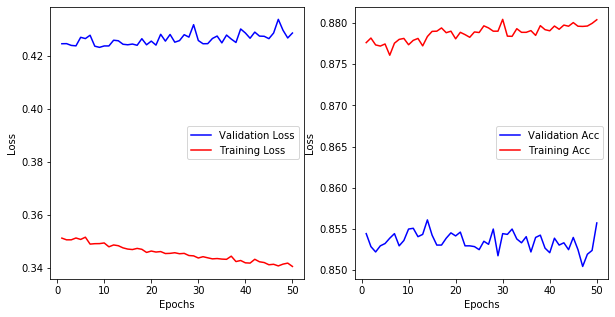

In [0]:
epochs = range(1,51)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.plot(epochs, history.history['loss'], 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation Acc')
plt.plot(epochs, history.history['acc'], 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [0]:
model.evaluate(X_test, y_test)[1]

10000/10000 [==============================] - 0s 34us/step


0.8468

In [0]:
#Check out a few of the outputs

pred = model.predict_classes(X_test)

In [0]:
pred[0:10] , class_labels_dict

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 {0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'})

(-0.5, 27.5, 27.5, -0.5)

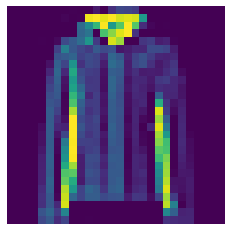

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_test[6])
plt.axis('off')

In [0]:
import pandas as pd
import numpy as np
id=np.arange(60001,70001)
label=pred

Submission_array=np.array([id,label])
Submission1=pd.DataFrame(Submission_array).T
Submission1.rename(columns={0: 'id', 1: 'label'}, inplace=True)


from google.colab import files
Submission1.to_csv('Apparel_submit1.csv') 
files.download('Apparel_submit1.csv')

In [0]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

Add another dense layer

In [0]:
model=Sequential()
model.add(Dense(1024, input_shape=(784,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model=Sequential()
model.add(Dense(1024, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))

model=Sequential()
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))

model=Sequential()
model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))

model=Sequential()
model.add(Dense(10, activation='softmax'))

opt=adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train,y_train, epochs=100, batch_size=512, validation_data=(X_Test, y_Test))

Train on 43200 samples, validate on 10800 samples
Epoch 1/100
43200/43200 [==============================] - 1s 14us/step - loss: 1.1668 - acc: 0.6235 - val_loss: 0.7909 - val_acc: 0.7381
Epoch 2/100
43200/43200 [==============================] - 0s 8us/step - loss: 0.7034 - acc: 0.7693 - val_loss: 0.6644 - val_acc: 0.7859
Epoch 3/100
43200/43200 [==============================] - 0s 9us/step - loss: 0.6130 - acc: 0.7999 - val_loss: 0.6040 - val_acc: 0.8060
Epoch 4/100
43200/43200 [==============================] - 0s 9us/step - loss: 0.5660 - acc: 0.8137 - val_loss: 0.5698 - val_acc: 0.8135
Epoch 5/100
43200/43200 [==============================] - 0s 8us/step - loss: 0.5343 - acc: 0.8228 - val_loss: 0.5458 - val_acc: 0.8198
Epoch 6/100
43200/43200 [==============================] - 0s 9us/step - loss: 0.5139 - acc: 0.8288 - val_loss: 0.5292 - val_acc: 0.8249
Epoch 7/100
43200/43200 [==============================] - 0s 9us/step - loss: 0.4980 - acc: 0.8343 - val_loss: 0.5180 - val_ac

In [0]:
results=model.evaluate(X_val, y_val)
results[1]

6000/6000 [==============================] - 0s 38us/step


0.8571666666666666

In [0]:
pred = model.predict_classes(X_test)
import pandas as pd
import numpy as np
id=np.arange(60001,70001)
label=pred

Submission_array=np.array([id,label])
Submission=pd.DataFrame(Submission_array).T
Submission.rename(columns={0: 'id', 1: 'label'}, inplace=True)


from google.colab import files
Submission.to_csv('Apparel_submit2.csv') 
files.download('Apparel_submit2.csv')

# No major change. Try Conv Layer